# Prosper Loan Data Exploration
## by Lia Anggraeni

## Preliminary Wrangling

> This notebook contains an exploration of the prosper loan dataset consisting of 113937 rows and 81 columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load data
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# show number of rows and columns
df_loan.shape

(113937, 81)

In [5]:
# show the number of data and data type for each column
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [7]:
# make a list of columns to be used
selected_colomns = ['CreditGrade', 'LoanStatus', 'ProsperScore', 'EmploymentStatus', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'EstimatedLoss']

In [8]:
# copy data from df_loan
df_loan2 = df_loan[selected_colomns].copy()

In [9]:
df_loan2 = df_loan2.query('(LoanStatus == "Completed") | (LoanStatus == "Chargedoff")').copy()

In [10]:
df_loan2.shape

(50066, 9)

In [11]:
df_loan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50066 entries, 0 to 113935
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditGrade          24938 non-null  object 
 1   LoanStatus           50066 non-null  object 
 2   ProsperScore         25000 non-null  float64
 3   EmploymentStatus     48336 non-null  object 
 4   StatedMonthlyIncome  50066 non-null  float64
 5   MonthlyLoanPayment   50066 non-null  float64
 6   LoanOriginalAmount   50066 non-null  int64  
 7   DebtToIncomeRatio    46091 non-null  float64
 8   EstimatedLoss        25000 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.8+ MB


In [12]:
df_loan2.LoanStatus.value_counts()

Completed     38074
Chargedoff    11992
Name: LoanStatus, dtype: int64

In [13]:
# show statistic summary
df_loan2.describe()

,ProsperScore,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss
count,25000.000000,50066.000000,50066.000000,50066.000000,46091.000000,25000.000000
mean,6.291960,5123.675099,222.751226,6239.350957,0.281663,0.093065
std,2.320305,5896.054365,183.126604,5150.099434,0.705738,0.055125
min,1.000000,0.000000,0.000000,1000.000000,0.000000,0.004900
25%,5.000000,2842.937500,98.190000,2700.000000,0.120000,0.050000
50%,6.000000,4208.333333,172.760000,4500.000000,0.200000,0.097500
75%,8.000000,6250.000000,300.000000,8000.000000,0.300000,0.140000
max,11.000000,618547.833333,2251.510000,35000.000000,10.010000,0.366000


In [14]:
df_loan2.to_csv('prosperLoanData_new1.csv')

### What is the structure of your dataset?

> The original dataset contained 113937 rows and 81 columns. However, I will only use data that has a loan status charged off and completed. I will also only use a few variables to analyze. The total data that I used before I did the cleaning process is 50066 data with 8 columns.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out what factors affect Completed and Chargedoff on the LoanStatus variable


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> CreditGrade, ProsperScore, EmploymentStatus, StatedMonthlyIncome, MonthlyLoanPayment, DebtToIncomeRatio, EstimatedLoss

## Univariate Exploration


In [15]:
base_color = sns.color_palette()[0]

### CreditGrade.

In [16]:
# show number of data CreditGrade each unique value
df_loan2.CreditGrade.value_counts()

C     4919
D     4469
B     3896
AA    3308
A     3031
E     2624
HR    2614
NC      77
Name: CreditGrade, dtype: int64

I will change the value of 'NC' (No Credit) to NaN

In [17]:
# Check the amount of data that has a blank CreditGrade value 
sum(df_loan2['CreditGrade'].isna())

25128

In [18]:
# change NC to NaN
df_loan2.loc[df_loan2.CreditGrade == 'NC', 'CreditGrade'] = None

In [19]:
sum(df_loan2['CreditGrade'].isna())

25205

In [20]:
credit_grade = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'] # NC no grade
cgrade = pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df_loan2['CreditGrade'] = df_loan2['CreditGrade'].astype(cgrade)

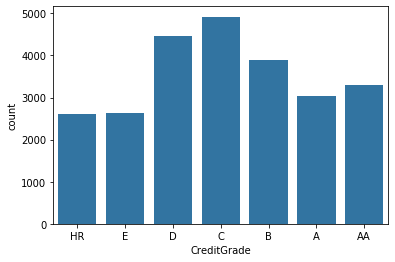

In [21]:
sns.countplot(df_loan2.CreditGrade, color=base_color);

credit grade C is the most credit grade owned by the borrower

### LoanStatus

In [22]:
df_loan2.LoanStatus.value_counts()

Completed     38074
Chargedoff    11992
Name: LoanStatus, dtype: int64

to facilitate processing I will change the value of LoanStatus to boolean. Completed: 1, Chargedoff: 0

In [23]:
# change Completed to 1 and Chargedoff to 0
df_loan2.LoanStatus = df_loan2.LoanStatus.map(dict(Completed=1, Chargedoff=0))

In [24]:
df_loan2.LoanStatus.value_counts()

1    38074
0    11992
Name: LoanStatus, dtype: int64

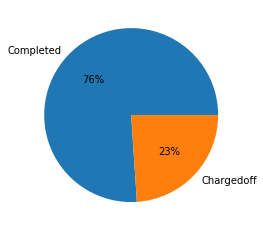

In [25]:
data = df_loan2.LoanStatus.value_counts()
plt.pie(data, labels=['Completed', 'Chargedoff'], autopct='%1d%%');

There are more borrowers who have completed loan status compared to those who have charged off status. 76% completed while 23% were charged off.

### ProsperScore

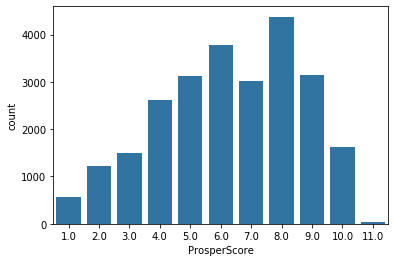

In [26]:
sns.countplot(df_loan2.ProsperScore, color=base_color)

### EmploymentStatus

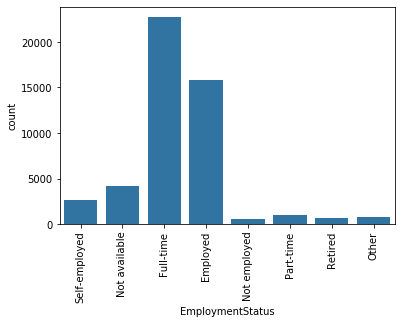

In [27]:
sns.countplot(df_loan2.EmploymentStatus, color=base_color)
plt.xticks(rotation=90);

Most borrowers have full time employment status

### StatedMonthlyIncome

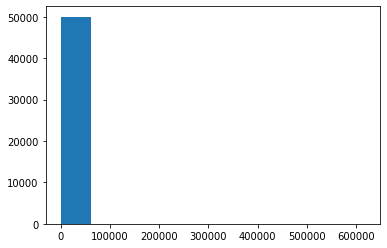

In [28]:
plt.hist(df_loan2.StatedMonthlyIncome);

The data looks like only located around the point 0 - 60000, while the x axis exceeds 600000. It seems that there is an outlier in the StatedMonthlyIncome column, for more details, I will plot it into the boxplot.

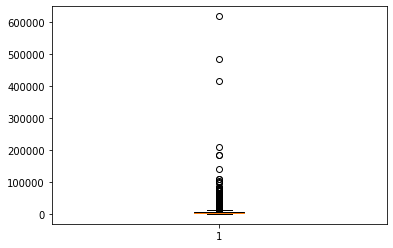

In [29]:
plt.boxplot(df_loan2.StatedMonthlyIncome);

data that has StatedMonthlyIncome > 100000 is classified as an outlier

In [30]:
# show data that have StatedMonthlyIncome > 100000
df_loan2[df_loan2.StatedMonthlyIncome > 100000]

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss
8066,NaN,1,4.0,Employed,416666.666667,87.10,2000,0.00,0.1830
8870,A,0,NaN,Not available,208333.333333,415.18,12500,0.01,NaN
17411,NaN,1,5.0,Employed,483333.333333,326.62,7500,0.00,0.1470
35218,NaN,1,10.0,Full-time,108333.333333,0.00,1000,NaN,0.0060
53014,NaN,1,3.0,Self-employed,618547.833333,366.62,4000,NaN,0.0975
56867,AA,1,NaN,Self-employed,185081.750000,811.97,25000,0.01,NaN
63925,E,1,NaN,Not available,140416.666667,79.52,2000,0.02,NaN
78431,C,0,NaN,Full-time,103334.083333,184.60,5000,0.00,NaN
83697,AA,1,NaN,Not available,185081.750000,156.68,5000,0.00,NaN
111265,NaN,1,9.0,Employed,108750.000000,325.47,12765,0.03,0.0599


data with StatedMonthlyIncome> 100000, has a much larger StatedMonthlyIncome compared to LoanOriginalAmount. I don't think it's possible, it might be a system error or an input data error.

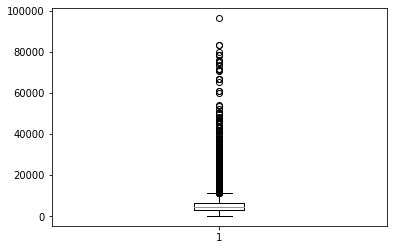

In [31]:
plt.boxplot(df_loan2[df_loan2.StatedMonthlyIncome < 100000].StatedMonthlyIncome);

data that has a StateMonthlyIncome> 20000 is also classified as an outlier

In [32]:
df_loan2[(df_loan2.StatedMonthlyIncome < 100000) & (df_loan2.StatedMonthlyIncome > 20000)]

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss
521,C,1,NaN,Full-time,30166.666667,177.52,5000,0.16000,NaN
667,B,0,NaN,Full-time,31666.666667,859.91,25000,0.12000,NaN
847,NaN,1,9.0,Employed,25000.000000,328.10,10000,0.08000,0.0350
1137,NaN,1,5.0,Employed,37500.000000,173.71,4000,0.14000,0.1625
1171,NaN,0,8.0,Employed,34813.250000,724.00,25000,0.05000,0.0799
...,...,...,...,...,...,...,...,...,...
112660,NaN,1,5.0,Full-time,25000.000000,558.46,15000,0.05000,0.0620
112776,NaN,1,2.0,Employed,29166.666667,371.76,4000,0.13000,0.1175
113234,NaN,1,8.0,Full-time,25000.000000,196.40,6000,0.28000,0.0495
113776,NaN,1,10.0,Employed,23750.000000,258.59,3000,0.10000,0.0200


There is some data that has a difference between StatedMonthlyIncome and LoanOriginalAmount, which is not too large like the data in index 1171, so I will calculate the difference between StatedMonthlyIncome and LoanOriginalAmount to determine which data I will delete.

In [33]:
# calculate the StatedMonthlyIncome difference with LoanOriginalAmount
df_loan2['diff_income_loan'] = df_loan2.StatedMonthlyIncome - df_loan2.LoanOriginalAmount

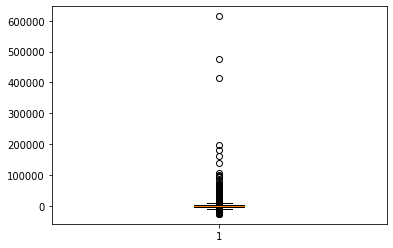

In [34]:
plt.boxplot(df_loan2.diff_income_loan);

data that has diff_income_loan> 20000 is classified as an outlier

In [35]:
df_loan2[df_loan2.diff_income_loan > 20000]

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss,diff_income_loan
521,C,1,NaN,Full-time,30166.666667,177.52,5000,0.16,NaN,25166.666667
1137,NaN,1,5.0,Employed,37500.000000,173.71,4000,0.14,0.1625,33500.000000
1304,NaN,1,8.0,Employed,31250.000000,361.47,10000,0.07,0.0595,21250.000000
1866,NaN,1,5.0,Self-employed,41666.666667,274.17,3000,NaN,0.0975,38666.666667
3274,AA,1,NaN,Full-time,50000.000000,75.94,2500,0.06,NaN,47500.000000
...,...,...,...,...,...,...,...,...,...,...
111265,NaN,1,9.0,Employed,108750.000000,325.47,12765,0.03,0.0599,95985.000000
111284,AA,1,NaN,Not available,23333.333333,61.75,2000,0.06,NaN,21333.333333
111772,AA,1,NaN,Full-time,21666.666667,30.88,1000,0.09,NaN,20666.666667
112776,NaN,1,2.0,Employed,29166.666667,371.76,4000,0.13,0.1175,25166.666667


In [36]:
# delete data that has diff_income_loan> 20000
drop_index = df_loan2[df_loan2.diff_income_loan > 20000].index
df_loan2.drop(drop_index, inplace=True)

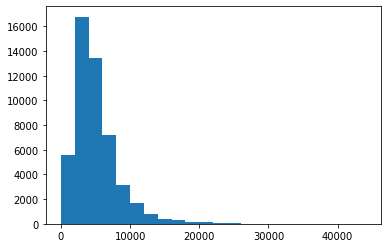

In [37]:
bins = np.arange(0, df_loan2.StatedMonthlyIncome.max()+2000, 2000)
plt.hist(df_loan2.StatedMonthlyIncome, bins=bins);

StateMonthlyIncome has right skewed distribution

### MonthlyLoanPayment

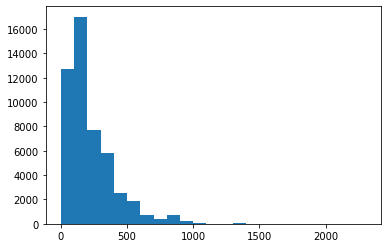

In [38]:
bins = np.arange(0, df_loan2.MonthlyLoanPayment.max()+100, 100)
plt.hist(df_loan2.MonthlyLoanPayment, bins=bins);

MonthlyLoanPayment has right skewed distribution

### DebtToIncomeRatio

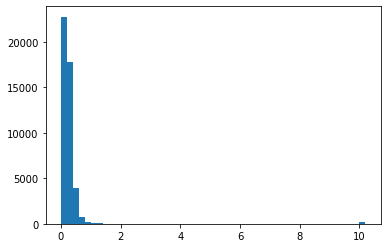

In [39]:
bins = np.arange(0, df_loan2.DebtToIncomeRatio.max()+0.2, 0.2)
plt.hist(df_loan2.DebtToIncomeRatio, bins=bins);

In [40]:
df_loan2[df_loan2.DebtToIncomeRatio > 5]

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss,diff_income_loan
226,D,1,NaN,Full-time,0.083333,32.27,1000,10.01,NaN,-999.916667
576,AA,1,NaN,Retired,0.083333,47.94,1500,10.01,NaN,-1499.916667
1242,A,1,NaN,Not employed,0.083333,97.82,3000,10.01,NaN,-2999.916667
2155,NaN,1,8.0,Full-time,17083.333333,425.36,13500,10.01,0.015,3583.333333
2217,C,1,NaN,Not available,0.083333,245.13,7000,10.01,NaN,-6999.916667
...,...,...,...,...,...,...,...,...,...,...
111146,C,1,NaN,Self-employed,0.083333,142.48,3999,10.01,NaN,-3998.916667
111321,A,1,NaN,Self-employed,0.083333,351.57,10000,10.01,NaN,-9999.916667
112308,A,1,NaN,Self-employed,0.083333,210.39,6001,10.01,NaN,-6000.916667
112712,D,0,NaN,Full-time,0.083333,111.81,2850,10.01,NaN,-2849.916667


There is a StatedMonthlyIncome value of less than 1 dollar. It is impossible for people to survive on a gross income per month of less than 1 dollar. In addition, some data have good credit grade and full-time employed status. This might be a data input error or another error might occur.

In [41]:
df_loan2[df_loan2.StatedMonthlyIncome < 1]

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss,diff_income_loan
78,A,0,NaN,Full-time,0.000000,171.13,4800,NaN,NaN,-4800.000000
100,NaN,0,3.0,Not employed,0.000000,172.76,4000,NaN,0.1575,-4000.000000
108,C,1,NaN,Full-time,0.000000,564.07,14000,NaN,NaN,-14000.000000
146,A,1,NaN,NaN,0.083333,127.66,4000,0.07,NaN,-3999.916667
170,NaN,1,5.0,Not employed,0.000000,397.55,10000,NaN,0.1190,-10000.000000
...,...,...,...,...,...,...,...,...,...,...
113622,NaN,0,6.0,Not employed,0.000000,171.08,4000,NaN,0.1470,-4000.000000
113626,A,1,NaN,NaN,0.083333,891.32,25000,10.01,NaN,-24999.916667
113682,NaN,0,5.0,Not employed,0.000000,323.35,10000,NaN,0.1190,-10000.000000
113686,A,1,NaN,Full-time,0.000000,560.21,14900,NaN,NaN,-14900.000000


In [42]:
df_loan2[(df_loan2.StatedMonthlyIncome > 1) & (df_loan2.StatedMonthlyIncome < 10)]

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss,diff_income_loan
2138,C,1,NaN,Full-time,3.333333,56.51,1500,NaN,NaN,-1496.666667
3300,NaN,0,4.0,Employed,8.333333,173.71,4000,NaN,0.1650,-3991.666667
5806,NaN,1,3.0,Employed,5.833333,86.85,2000,10.01,0.1625,-1994.166667
8748,NaN,0,6.0,Employed,1.833333,131.00,3000,10.01,0.1420,-2998.166667
19270,A,1,NaN,Full-time,2.500000,377.86,11500,0.47,NaN,-11497.500000
20820,NaN,1,5.0,Self-employed,5.416667,473.39,15000,NaN,0.1190,-14994.583333
21647,NaN,1,6.0,Employed,4.166667,369.31,4000,NaN,0.1070,-3995.833333
26112,NaN,1,4.0,Full-time,2.416667,95.81,2200,10.01,0.1830,-2197.583333
27006,B,1,NaN,Full-time,4.166667,391.35,9730,NaN,NaN,-9725.833333
40657,NaN,1,4.0,Self-employed,5.000000,173.71,4000,NaN,0.1650,-3995.000000


I will delete the data with a monthly income of less than 10 dollars. Because I assume it is impossible for someone to earn 10 dollars in the United States, and also dare to make loans far greater than their monthly income.

In [43]:
# delete data that has statedmonthlyincome <10
drop_index = df_loan2[df_loan2.StatedMonthlyIncome < 10].index
df_loan2.drop(drop_index, inplace=True)

### DebtToIncomeRatio

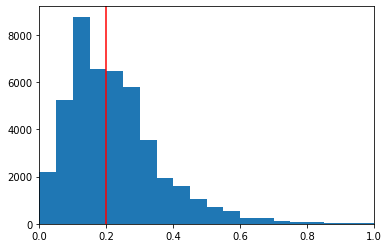

In [44]:
bins = np.arange(0, df_loan2.DebtToIncomeRatio.max()+0.05, 0.05)
plt.hist(df_loan2.DebtToIncomeRatio, bins=bins)
plt.axvline(df_loan2.DebtToIncomeRatio.median(), color='red')
plt.xlim(0, 1);

DebtToIncomeRatio has right skewed distribution

### EstimatedLoss

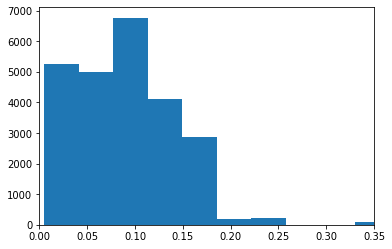

In [45]:
plt.hist(df_loan2.EstimatedLoss)
plt.xlim(0, 0.35);

Estimated loss variables are relatively normally distributed

### Save data that has been cleaned

In [46]:
df_loan2.shape

(48642, 10)

In [47]:
# copy data that have loanStatus = 1
temporary_data = df_loan2.query('LoanStatus == 1').copy()

In [48]:
temporary_data.shape

(37101, 10)

In [49]:
# taking data samples as much as the amount of data with LoanStatus 1
random.seed(102)
sample = temporary_data.sample(11541, replace=False)

In [50]:
sample.head(1)

,CreditGrade,LoanStatus,ProsperScore,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,EstimatedLoss,diff_income_loan
84351,NaN,1,6.0,Employed,6001.666667,343.91,15000,0.3,0.0399,-8998.333333


In [51]:
# delete data on df_loan2 which has LoanStatus 1
drop_index = df_loan2[df_loan2.LoanStatus == 1].index
df_loan2.drop(drop_index, inplace=True)

In [52]:
df_loan2.shape

(11541, 10)

In [53]:
# add sample dataset to df_loan2 dataset
df_loan2 = df_loan2.append(sample, ignore_index=True)

In [54]:
df_loan2.LoanStatus.value_counts()

1    11541
0    11541
Name: LoanStatus, dtype: int64

The amount of data that has LoanStatus 1 is the same as the amount of data that has LoanStatus 0

In [55]:
# save data that has been cleaned
df_loan2.to_csv('prosperLoanData_new2.csv')

In [56]:
df_loan2.shape

(23082, 10)

The total amount of data to be further analyzed is 23082 data

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> CreditGrate and ProsperScore have relatively normal distributions, while the EmploymentStatus, StateMonthlyIncome, MonthlyLoanPayment, DebtToIncomeRatio, and EstimatedLoss variables have the right skewed distribution.

> Out of 50066 observations, 76% have completed status while 23% have charged off status

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After seeing the distribution of the supporting variables of the analysis there are some changes in the data that I did, these changes are:
- Change the value of 'NC' (No Credit) on credit grade to NaN. This is so the NC value is not included during the calculation or data visualization.
- Calculate the difference between StatedMonthlyIncome with LoanOriginalAmount (diff_income_loan) and delete data that has a difference of more than 20000 dollars. I think it is impossible for people who have income per month that is far greater than the amount of loans to borrow money.
- Change the data on LoanStatus to be a boolean value, Completed to 1 and Chargedoff to 0 to facilitate data processing.
- Delete data that has a monthly income of less than 10 dollars. This is because I assume it is impossible for anyone to have an income of under 10 dollars per month and dare to borrow money from online loans.
- Taking samples from data that have LoanStatus 1 as much as data that has LoanStatus 0, this is because data with LoanStatus 1 is far more than data with LoanStatus 0.

## Bivariate Exploration

### CreditGrade vs LoanStatus

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

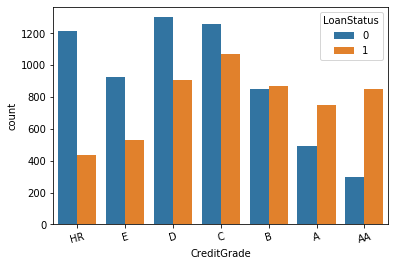

In [57]:
sns.countplot(data=df_loan2, x='CreditGrade', hue='LoanStatus')
plt.xticks(rotation=15)

Amount of data with LoanStatus Completed on HR-C credit grade smaller than data with LoanStatus charged off. In contrast, the amount of data with LoanStatus Completed on credit grade A and AA is greater than the amount of data with LoanStatus charged off. For credit grade B, the amount is almost the same between the amount of data with the competed LoanStatus and the amount of data that has a LoanStatus chargedoff.

In [58]:
def ratio(dataset, col1, col2):
    ratio_count = dataset.groupby([col1, col2]).size().unstack().add_prefix('count_')
    ratio_count['chargedoff_percent'] = (ratio_count.count_0 / ratio_count.sum(1)) * 100
    ratio_count.reset_index(inplace=True)
    return ratio_count

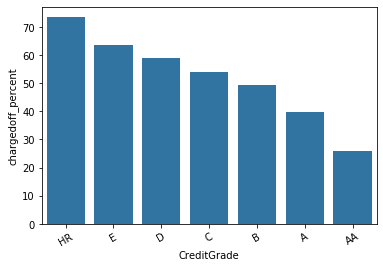

In [59]:
data = ratio(df_loan2, 'CreditGrade', 'LoanStatus')
sns.barplot(data=data, x='CreditGrade', y='chargedoff_percent', 
            color=base_color)
plt.xticks(rotation=30);

It can be seen clearly the better the credit grade of the borrower the smaller the percentage of charged off loans

In [60]:
data

LoanStatus,CreditGrade,count_0,count_1,chargedoff_percent
0,HR,1218,438,73.550725
1,E,928,533,63.518138
2,D,1301,910,58.842153
3,C,1259,1072,54.011154
4,B,850,867,49.504950
5,A,491,749,39.596774
6,AA,298,852,25.913043


### ProsperScore vs LoanStatus

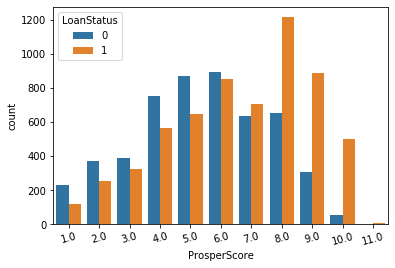

In [61]:
sns.countplot(data=df_loan2, x='ProsperScore', hue='LoanStatus')
plt.xticks(rotation=15);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

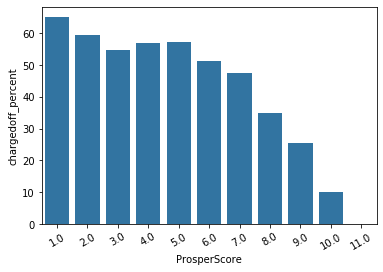

In [62]:
data = ratio(df_loan2, 'ProsperScore', 'LoanStatus')
sns.barplot(data=data, x='ProsperScore', y='chargedoff_percent', 
            color=base_color)
plt.xticks(rotation=30)

Overall, the greater the value of the prosper score, the smaller the percentage charged off

In [63]:
data

LoanStatus,ProsperScore,count_0,count_1,chargedoff_percent
0,1.0,228.0,122.0,65.142857
1,2.0,371.0,252.0,59.550562
2,3.0,392.0,324.0,54.748603
3,4.0,750.0,564.0,57.077626
4,5.0,870.0,649.0,57.274523
5,6.0,894.0,852.0,51.202749
6,7.0,637.0,706.0,47.431124
7,8.0,652.0,1214.0,34.941050
8,9.0,305.0,888.0,25.565801
9,10.0,56.0,503.0,10.017889


### EmploymentStatus vs LoanStatus

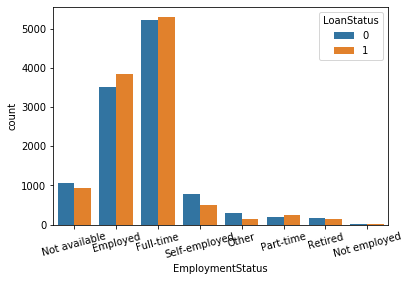

In [64]:
sns.countplot(data=df_loan2, x='EmploymentStatus', hue='LoanStatus')
plt.xticks(rotation=15);

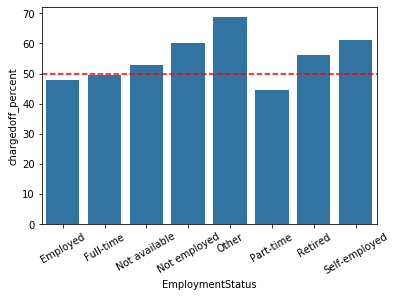

In [65]:
data = ratio(df_loan2, 'EmploymentStatus','LoanStatus')
sns.barplot(data=data, x='EmploymentStatus', y='chargedoff_percent', 
            color=base_color)
plt.xticks(rotation=30)
plt.axhline(y=50, color='red', linestyle='--')

Not available, not employed, other, retired, and self employed have a charged off percentage of more than 50%. 'Other' has the biggest charged off presentation. The interesting thing here is that part-time has the smallest charged off percentage among others.

### StatedMonthlyIncome vs LoanStatus

<Figure size 432x288 with 0 Axes>

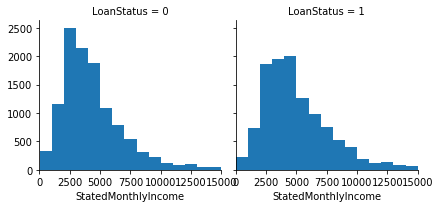

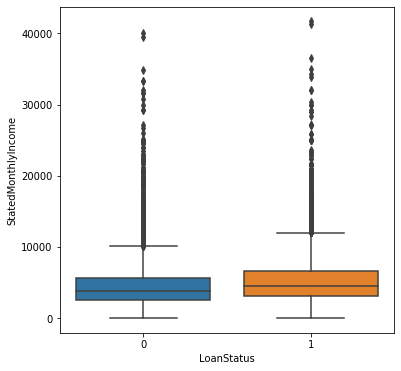

In [66]:
plt.figure()
bins= np.arange(10, df_loan2.StatedMonthlyIncome.max()+1000, 1000)
g = sns.FacetGrid(data=df_loan2, col='LoanStatus')
g.map(plt.hist, 'StatedMonthlyIncome', bins=bins)
plt.xlim(0, 15000);

plt.figure(figsize=(6, 6))
sns.boxplot(data=df_loan2, x='LoanStatus', y='StatedMonthlyIncome')

There is no significant difference between StatedMonthlyIncome from borrowers who have a LoanStatus charged off and StatedMonthlyIncome from borrowers who have completed status.

In [67]:
df_loan2.groupby('LoanStatus').StatedMonthlyIncome.median()

LoanStatus
0    3833.333333
1    4509.666667
Name: StatedMonthlyIncome, dtype: float64

### MonthlyLoanPayment vs LoanStatus

<Figure size 432x288 with 0 Axes>

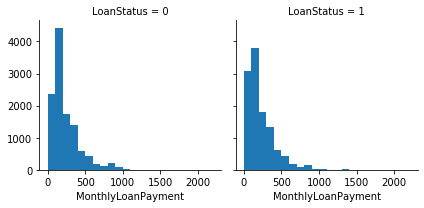

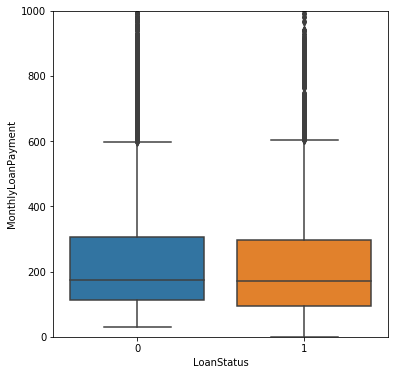

In [68]:
bins= np.arange(0, df_loan2.MonthlyLoanPayment.max()+100, 100)
plt.figure()
g = sns.FacetGrid(data=df_loan2, col='LoanStatus')
g.map(plt.hist, 'MonthlyLoanPayment', bins=bins)

plt.figure(figsize=(6, 6))
sns.boxplot(data=df_loan2, x='LoanStatus', y='MonthlyLoanPayment')
plt.ylim(0, 1000);

There is no significant difference between the StatedMonthlyIncome distribution of borrowers who have a LoanStatus charged off with the StatedMonthlyIncome distribution from borrowers who have a LoanStatus completed

In [69]:
df_loan2.groupby('LoanStatus').MonthlyLoanPayment.mean()

LoanStatus
0    233.144736
1    219.359422
Name: MonthlyLoanPayment, dtype: float64

### DebtToIncomeRatio vs LoanStatus

<Figure size 432x288 with 0 Axes>

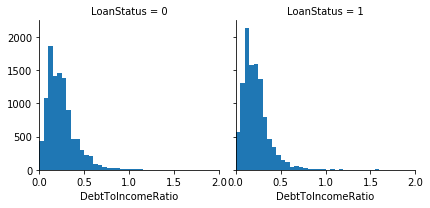

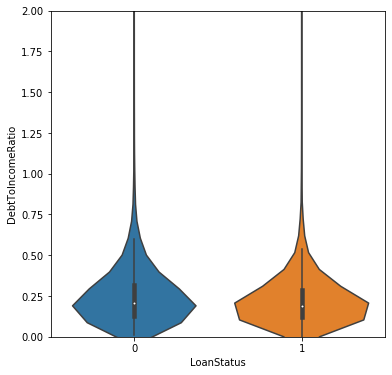

In [70]:
bins= np.arange(0, df_loan2.DebtToIncomeRatio.max()+0.05, 0.05)
plt.figure()
g = sns.FacetGrid(data=df_loan2, col='LoanStatus')
g.map(plt.hist, 'DebtToIncomeRatio', bins=bins)
plt.xlim(0, 2);

plt.figure(figsize=(6, 6))
sns.violinplot(data=df_loan2, x='LoanStatus', y='DebtToIncomeRatio')
plt.ylim(0, 2);

There is no significant difference between the DebtToIncomeRatio distribution of the LoanStatus charged off and the DebtToIncomeRatio distribution of LoanStatus completed.

In [71]:
df_loan2.groupby('LoanStatus').DebtToIncomeRatio.median()

LoanStatus
0    0.21
1    0.19
Name: DebtToIncomeRatio, dtype: float64

### EstimatedLoss vs LoanStatus

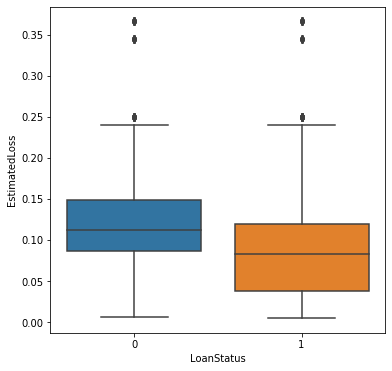

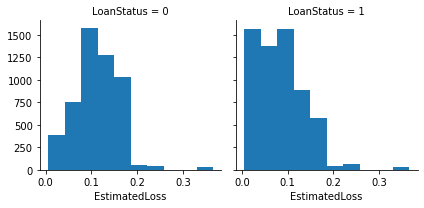

In [72]:
plt.figure(figsize=(6, 6))
plt.figure(1, 1, 1)
g = sns.FacetGrid(data=df_loan2, col='LoanStatus')
g.map(plt.hist, 'EstimatedLoss')

plt.figure(1, 2, 1)
sns.boxplot(data=df_loan2, x='LoanStatus', y='EstimatedLoss')

There is a significant difference in the EstimasedLoss distribution between loans that have completed LoanStatus and loans that have LoanStatus charged off. EstimasedLoss data with LoanStatus completed have right skewed distribution while EstimasedLoss data with LoanStatus charged off have relatively left skewed distribution.

### ProsperScore vs EstimatedLoss

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

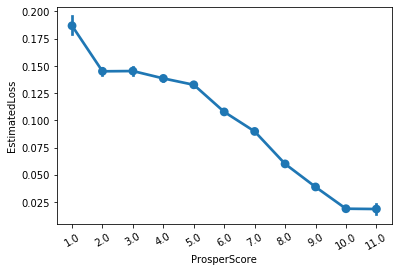

In [73]:
sns.pointplot(data=df_loan2, x='ProsperScore', y='EstimatedLoss')
plt.xticks(rotation=30)

Overall the greater the ProsperScore the smaller the EstimatedLoss value

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The higher the credit grade, the smaller the percentage of loans with a status charged off
- Overall, the greater the prosper score, the smaller the percentage of charged off
- Borrowers with employement not available, not employed, other, retired, and self employed status have a charged off percentage of more than 50%.
- There is no significant difference between StatedMonthlyIncome from borrowers who have a LoanStatus charged off and StatedMonthlyIncome from borrowers who have completed status.
- There is no significant difference between the StatedMonthlyIncome distribution of borrowers who have a LoanStatus charged off with the StatedMonthlyIncome distribution from borrowers who have a LoanStatus completed
- There is no significant difference between the DebtToIncomeRatio distribution of the LoanStatus charged off and the DebtToIncomeRatio distribution of LoanStatus completed.
- There is a significant difference in the EstimasedLoss distribution between loans that have completed LoanStatus and loans that have LoanStatus charged off. EstimasedLoss data with LoanStatus completed have right skewed distribution while EstimasedLoss data with LoanStatus charged off have relatively left skewed distribution.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Overall the greater the ProsperScore the smaller the EstimatedLoss value

## Multivariate Exploration

### Employment status, EstimatedLoss and Loan Status

(0, 0.2)

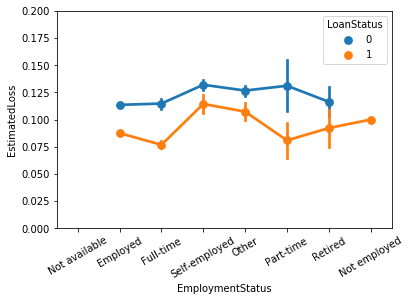

In [74]:
sns.pointplot(data=df_loan2, x='EmploymentStatus', y='EstimatedLoss', hue='LoanStatus')
plt.xticks(rotation=30)
plt.ylim(0, 0.20)

For each EmploymentStatus, data with LoanStatus 0 has an average value of EstimastedLoss greater than the average data with LoanStatus 1.

### ProsperScore, EstimatedLoss, chargedoff_percent

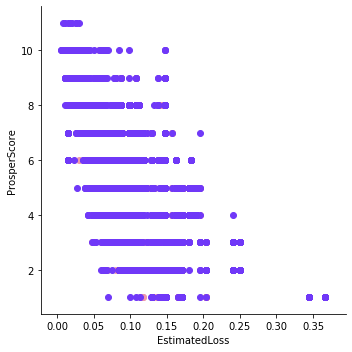

In [75]:
type_colors = {0: '#ee99ac', 1: '#7038f8'}
g = sns.FacetGrid(data = df_loan2, hue = 'LoanStatus', size = 5, palette = type_colors)
g.map(plt.scatter, 'EstimatedLoss','ProsperScore')

The difference between LoanStatus 0 data and LoanStatus 1 data is difficult to see when viewed using scatterplots

(0, 80)

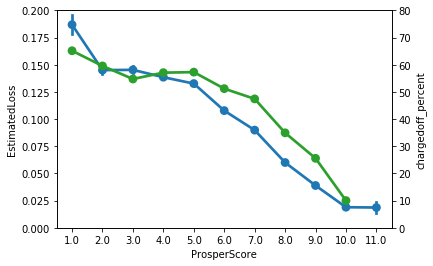

In [76]:
data = ratio(df_loan2, 'ProsperScore', 'LoanStatus')
fig, ax1 = plt.subplots()
sns.pointplot(data=df_loan2, x='ProsperScore', y='EstimatedLoss', ax=ax1)
ax1.set_ylim(0, 0.2)
ax2 = ax1.twinx()
sns.pointplot(data=data, x='ProsperScore', y='chargedoff_percent', ax=ax2, color=sns.color_palette()[2])
ax2.set_ylim(0, 80)

Overall EstimatedLoss and chargedoff_percent have almost the same trend data on each ProsperScore

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - For each EmploymentStatus, data with LoanStatus 0 has an average value of EstimastedLoss greater than the average data with LoanStatus 1.
- Overall EstimatedLoss and chargedoff_percent have almost the same trend data on each ProsperScore

Sources:
- https://stackoverflow.com/questions/46088436/grouping-and-counting-to-get-ratios-in-pandas
- https://stackoverflow.com/questions/51882279/seaborn-barplot-with-two-y-axis
- https://stackoverflow.com/questions/42767489/add-legend-to-seaborn-point-plot
- https://venngage.com/blog/color-blind-friendly-palette/